https://www.youtube.com/watch?v=8CMTqpZoec8

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

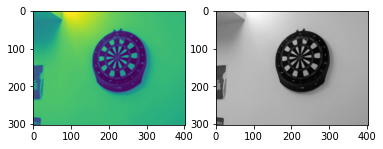

In [26]:
img = cv2.imread("data/test_detection_circle.jpg")
h, w, c = img.shape
img = cv2.resize(img, (int(w/10), int(h/10)), interpolation=cv2.INTER_AREA)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(img, 5)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(cimg)

count:  1


<ipython-input-27-2f270654eb4c>:6: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(cimg, (i[0], i[1]), int(i[2]), (0,255,0), 2)
<ipython-input-27-2f270654eb4c>:8: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(cimg, (i[0], i[1]), 2, (0,255,0), 3)


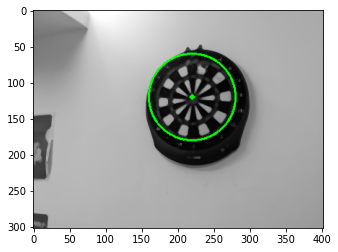

In [27]:
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 120, param1=100, param2=30, minRadius=10, maxRadius=300)
print("count: ", len(circles[0]))   # ouput: [x, y, radius]

for i in circles[0, :]:
    # outer circle
    cv2.circle(cimg, (i[0], i[1]), int(i[2]), (0,255,0), 2)
    # center of the circle
    cv2.circle(cimg, (i[0], i[1]), 2, (0,255,0), 3)

plt.imshow(cimg)

### ellipse detection in opencv python

count: 99
big_contour: (237, 1, 2)
second contour: (9, 1, 2)


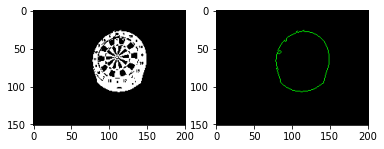

In [92]:
img = cv2.imread("data/test_detection_circle.jpg")
h,w,_ = img.shape
img = cv2.resize(img, (int(w/20),int(h/20)), interpolation=cv2.INTER_AREA)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    # --- 轉為灰度圖 ---
ret,th = cv2.threshold(gray,40,255, cv2.THRESH_BINARY) # --- 二值化 ---
th = cv2.bitwise_not(th)    # --- 像素反轉 ---

#--- Find all the contours in the binary image ---
contours,hierarchy = cv2.findContours(th,2,1)
print("count:", len(contours))
big_contour = []
max = 0
for i in contours:
    area = cv2.contourArea(i) #--- find the contour having biggest area ---
    if(area > max):
        max = area
        big_contour = i 
print("big_contour:",big_contour.shape)
contours.sort(key=lambda x: cv2.contourArea(i))
print("second contour:", contours[-2].shape)

black = np.zeros((img.shape[0],img.shape[1],3), np.uint8)
final = cv2.drawContours(black, big_contour, -1, (0,255,0), 1)
# for c in contours:final = cv2.drawContours(black, c, -1, (0,255,0), 5)
plt.subplot(1,2,1)
plt.imshow(th, 'gray')
plt.subplot(1,2,2)
plt.imshow(final, 'gray')

crop dart board area

width: 70 height: 81 ratio: 1.1571428571428573 standard ratio: 1.1


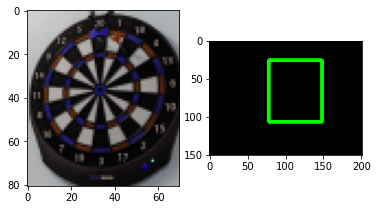

In [86]:
# crop dart board area
w_min = np.min(big_contour[:,0,0])
w_max = np.max(big_contour[:,0,0])
h_min = np.min(big_contour[:,0,1])
h_max = np.max(big_contour[:,0,1])

# draw board area
black = np.zeros((img.shape[0],img.shape[1],3), np.uint8)
cv2.rectangle(black, (w_min, h_min), (w_max, h_max), (0,255,0),3)

plt.subplot(1,2,1)
plt.imshow(img[h_min-1:h_max-1,w_min-1:w_max-1,:])
plt.subplot(1,2,2)
plt.imshow(black)

In [ ]:
ratio = (h_max-h_min)/(w_max-w_min)
s_ratio = 55/50
print("width:", w_max-w_min, "height:", h_max-h_min, "ratio:", ratio, "standard ratio:", s_ratio)

if ratio > s_ratio: # meaning width < s_width
    pass
else:  # meaning height < s_height
    pass 
    

## Reference
* ellipse detection in opencv python
https://stackoverflow.com/questions/42206042/ellipse-detection-in-opencv-python
* cv2.findContours
https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/557652/
* How to rectify a detected ellipse
https://stackoverflow.com/questions/26191714/how-to-rectify-a-detected-ellipse
* cv2.fitEllipse
https://www.cnblogs.com/as3asddd/p/7455712.html